# Support Vector Machines (SVM)

Support Vector Machines (SVM) are supervised machine learning models used for classification and regression tasks. SVM is popular for classification problems and works by finding the hyperplane that best separates different classes of data. The hyperplane is chosen such that it maximizes the margin between the two classes.

- **Support Vectors**: These are the data points that are closest to the hyperplane. These points influence the position and orientation of the hyperplane.
- **Margin**: The distance between the hyperplane and the support vectors. SVM maximizes this margin.
- **Kernel Trick**: SVM can be extended to non-linear boundaries using kernel functions (like RBF, Polynomial), which transform the data into a higher-dimensional space.

## Mathematical Intuition Behind SVM

### Objective
The goal of SVM is to find a hyperplane in an N-dimensional space (N being the number of features) that distinctly classifies the data points. 

### Maximize the Margin
SVM aims to find the optimal hyperplane that separates the classes with the maximum margin. In linear separable cases, this hyperplane has an equation of the form:

\[ w^T x + b = 0 \]

Where:
- `w` is the weight vector,
- `x` is the feature vector,
- `b` is the bias term.

For a point on the margin, the equation becomes either:
- \[ w^T x + b = 1 \] for the positive class
- \[ w^T x + b = -1 \] for the negative class.

Thus, the margin is computed as the perpendicular distance between the two margins and the hyperplane. The larger the margin, the better the classifier generalizes.

## Implementation

In [9]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

In [20]:
X, y = make_classification(random_state=42, n_samples=1000, n_features=2, n_informative=2, n_redundant=0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the SVM model with a linear kernel
model = SVC(kernel='linear')

# Train the model
model.fit(X_train, y_train)

SVC(kernel='linear')

In [21]:
# Test the model and calculate accuracy
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
accuracy

0.88

In [22]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88       101
           1       0.88      0.88      0.88        99

    accuracy                           0.88       200
   macro avg       0.88      0.88      0.88       200
weighted avg       0.88      0.88      0.88       200



## Hyperparameter Tuning
SVM has several hyperparameters to tune, such as:
- `C`: The regularization parameter that controls trade-offs between maximizing the margin and correctly classifying training points. A small value of `C` makes the margin larger but allows more misclassifications, while a large value emphasizes correct classification.
- `Kernel`: The function used to transform data into a higher-dimensional space. Common kernels are:
  - `linear`: Linear hyperplane
  - `poly`: Polynomial kernel
  - `rbf`: Radial Basis Function (Gaussian)

Let's try tuning the hyperparameters for better performance.

In [4]:
# Tuning the model with RBF kernel and different C values
svm_model_rbf = SVC(kernel='rbf', C=1.0)
svm_model_rbf.fit(X_train, y_train)
y_pred_rbf = svm_model_rbf.predict(X_test)
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
accuracy_rbf

## Visualization
Visualizing the decision boundary and the support vectors in an SVM classifier helps in understanding the model. However, we can only visualize data in two dimensions. We'll plot the decision boundaries of the model using two features from the Iris dataset.


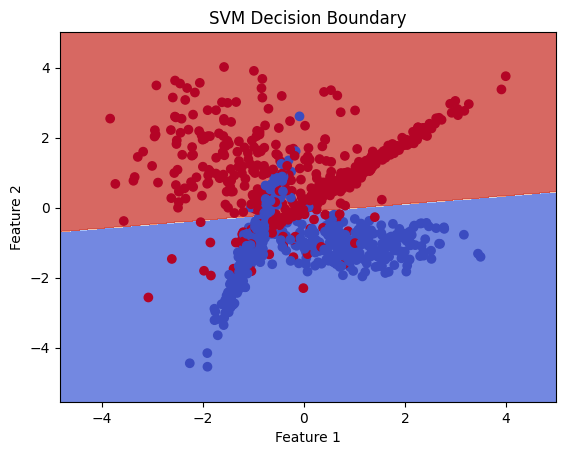

In [18]:
# Import visualization libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

# Using only two features for visualization
X_vis = X[:, :2]  # Only taking first two features for simplicity

# Split the reduced dataset
X_train_vis, X_test_vis, y_train_vis, y_test_vis = train_test_split(X_vis, y, test_size=0.2, random_state=42)

# Train SVM on the reduced dataset
svm_model_vis = SVC(kernel='linear', C=1.0)
svm_model_vis.fit(X_train_vis, y_train_vis)

# Create a mesh to plot the decision boundary
h = .02  # step size in the mesh
x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Plot the decision boundary
Z = svm_model_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

# Plot the training points
plt.scatter(X_vis[:, 0], X_vis[:, 1], c=y, cmap=plt.cm.coolwarm)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SVM Decision Boundary')
plt.show()


- We used only the first two features from the dataset for visualization.

SVM Linear is a 2D surface that classifies data points. It is also called Maximum margin linear classifier - setting maximum margin. It ensures that the margin between the closest points of different classes (Support Vectors). 

Dimension of the hyperplane covers the number of features. In non-linear svm, there can be multiple planes or decision boundaries to seggregate the classes in n dimensional space. We need to find out the best decision boundary that helps classify the data points. This best boundary is known as the hyperplane. Simply SVM is a machine learning algorithm to find the hyperplane in any n-dimensional space.

When outliers are there, we need to misclassify or ignore it. If we consider outliers, it might result in minimum margin and hence wrong prediction.

### Soft Margin Formulation

It allows SVM to make a certain number of mistakes, and keep margin as wide as possible, so that other data points can still be classified correctly.

### C 

The C parameter is used to specify misclassificaiton, which helps in widening the margin.

### Errors

1. Classification Error (A)
2. Margin Error (B)